In [6]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import kagglehub

/home/cam/miniforge3/envs/jupyter_dl/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Load a model
model = YOLO("yolo11n.pt")

# Train the model
train_results = model.train(
    data="coco8.yaml",  # path to dataset YAML
    epochs=100,  # number of training epochs
    imgsz=640,  # training image size
    device="cuda",  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
)

# Evaluate model performance on the validation set
metrics = model.val()



# Export the model to ONNX format
path = model.export(format="onnx")  # return path to exported model

In [3]:
%matplotlib inline

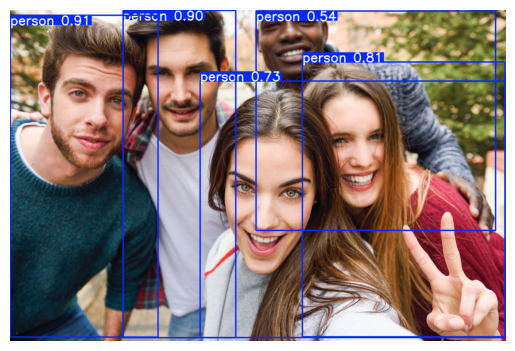

In [4]:
# Perform object detection on an image
results = model("people.jpg")

# Convert the results to an image array
img_with_boxes = results[0].plot()  # This returns a NumPy array with bounding boxes drawn

# Convert from BGR to RGB for proper display in matplotlib
img_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)

# Display the image in the notebook
plt.imshow(img_rgb)
plt.axis("off")  # Hide axes
plt.show()

In [ ]:
data_path = kagglehub.dataset_download("osmankagankurnaz/facial-feature-extraction-dataset")
yaml_path = os.path.join(data_path, 'Facial Feature Extraction Dataset/data.yaml')
model_path = "yolo11n.pt"  # Change this if using a different pretrained model

# Load the YOLO model
face_model = YOLO(model_path)

# Fine-tune the model on the dataset
train_results = face_model.train(
    data=yaml_path,  # Path to dataset YAML
    epochs=50,  # Adjust based on performance
    imgsz=640,  # Image size (adjust as needed)
    batch=16,  # Adjust based on GPU memory
    device="cuda",  # Use GPU if available
    workers=4,  # Number of workers for data loading
    optimizer="AdamW",  # Use AdamW optimizer for fine-tuning
    lr0=1e-3,  # Initial learning rate
    weight_decay=5e-4,  # Regularization
    patience=5,  # Stop early if no improvement
)

# Evaluate performance on validation set
metrics = face_model.val()


image 1/1 /home/cam/Development/csc487/people.jpg: 448x640 4 eyes, 4 eyebrows, 5 lips, 5 mustache-beards, 5 noses, 4.2ms
Speed: 2.1ms preprocess, 4.2ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


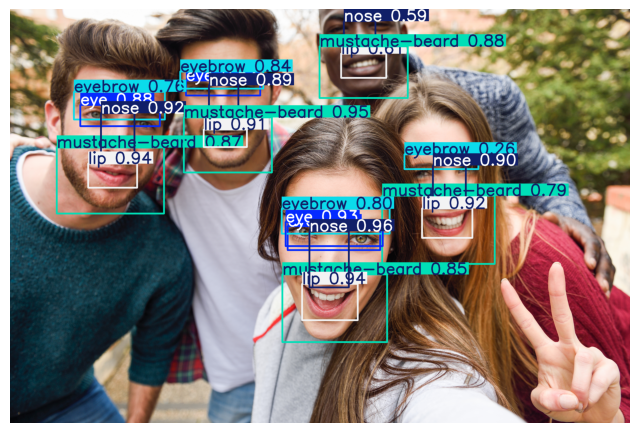

In [14]:
# Perform object detection on an image
results = face_model("people.jpg")

# Convert the results to an image with bounding boxes
img_with_boxes = results[0].plot()

# Convert BGR to RGB for correct display
img_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)

# Display the result
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.axis("off")
plt.show()

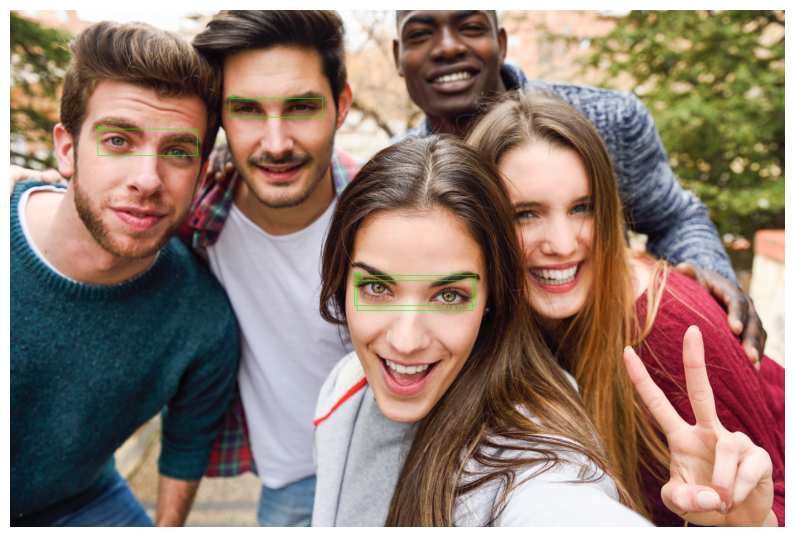

In [22]:
def plot_eyes(img):
    # Extract bounding boxes and class names
    boxes = results[0].boxes  # Get detected bounding boxes
    class_names = results[0].names  # Get class names
    
    # Convert YOLO tensor boxes to NumPy array
    if boxes is not None:
        boxes_data = boxes.xyxy.cpu().numpy()  # Convert to (x1, y1, x2, y2) format
        class_ids = boxes.cls.cpu().numpy()  # Class indices
    
        # Loop through detected objects
        for box, class_id in zip(boxes_data, class_ids):
            class_id = int(class_id)  # Convert to integer
            class_name = class_names.get(class_id, "Unknown")
    
            # Filter only 'eye' detections
            if class_name == "eye":
                x1, y1, x2, y2 = map(int, box)  # Get bounding box coordinates
    
                # Draw bounding box on the image
                cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 3)  # Green box for eyes
                cv2.putText(img, class_name, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 
                            1, (0, 255, 0), 2, cv2.LINE_AA)
    
    # Convert image to RGB for correct display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display the image with eye bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()
    
# Get the original image
img = results[0].orig_img.copy()
plot_eyes(img)


image 1/1 /home/cam/Development/csc487/tyler.png: 640x640 1 eye, 1 eyebrow, 1 lip, 1 mustache-beard, 1 nose, 4.2ms
Speed: 7.4ms preprocess, 4.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


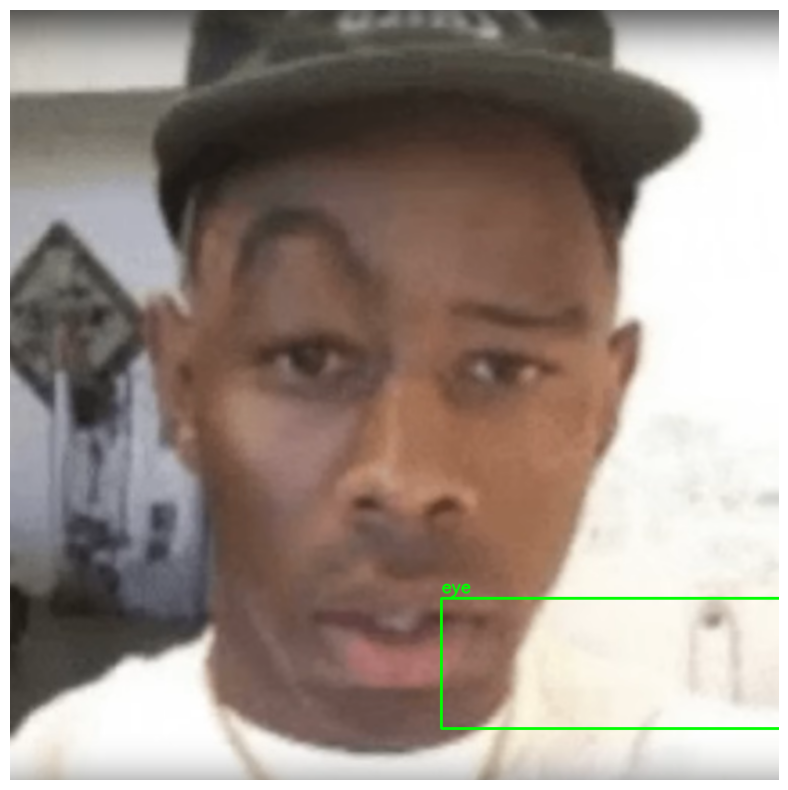

In [33]:
# Try fine-tuning first model on 2nd dataset?
img = face_model('tyler.png')[0].orig_img.copy()
plot_eyes(img)

In [34]:
# Export the model to ONNX format
path = face_model.export(format="onnx")  # return path to exported model
path

Ultralytics 8.3.78 🚀 Python-3.9.21 torch-2.6.0+cu124 CPU (AMD Ryzen 7 7700X 8-Core Processor)

PyTorch: starting from 'runs/detect/train8/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 9, 8400) (5.2 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.48...
ONNX: export success ✅ 0.6s, saved as 'runs/detect/train8/weights/best.onnx' (10.1 MB)

Export complete (0.8s)
Results saved to /home/cam/Development/csc487/runs/detect/train8/weights
Predict:         yolo predict task=detect model=runs/detect/train8/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train8/weights/best.onnx imgsz=640 data=/home/cam/.cache/kagglehub/datasets/osmankagankurnaz/facial-feature-extraction-dataset/versions/1/Facial Feature Extraction Dataset/data.yaml  
Visualize:       https://netron.app


'runs/detect/train8/weights/best.onnx'